# マスクを作成する

In [1]:
import glob
import os
from fits_reader import fits_reader
import numpy as np
import importlib
import matplotlib.pyplot as plt
importlib.reload(fits_reader)
home_directory = os.environ['HOME']
season_name = "/WSMR2021May"
experiment_name = "/abs_calib/NIR"
experiment_directory = home_directory + season_name + experiment_name
chs = ["ch1","ch2","ch3"]
# chs = ["ch3"]

plot_data_set = {}
plot_data_set_std= {}
masks = {}

for ch in chs:
    print("ch is : ",ch)
    folders = glob.glob(experiment_directory+"/frames/"+ ch + "/*")
    reset_fits = fits_reader.getResetFits(folders)
    data_set = fits_reader.getFitsDataSet(reset_fits)
    plot_data_set[ch] = np.average(data_set,axis = 0)
    plot_data_set_std[ch] = np.abs(np.std(data_set,axis = 0)/plot_data_set[ch])
    masks[ch] = np.where(plot_data_set_std[ch] < 1000, 1 , np.nan)
#     break

ch is :  ch1
ch is :  ch2
ch is :  ch3


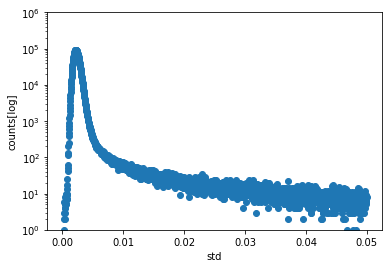

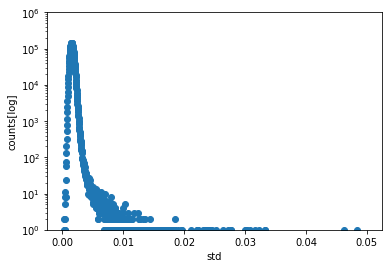

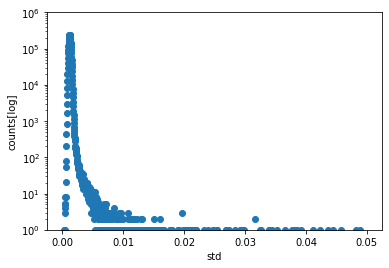

In [2]:
import numpy as np
for ch in chs:
    data = plot_data_set_std[ch]
    y,x = np.histogram(data,bins = 2000,range=(0,0.05))
    fig,ax = plt.subplots()
    ax.scatter(x[:-1],y)
    ax.set_xlabel("std")
    ax.set_yscale("log")
    ax.set_ylabel("counts[log]")
    ax.set_ylim(10**0,10**6)

In [63]:
# import math
# print(np.log10(plot_data_set_std[ch]))
# print(plot_data_set_std[ch])


[[-2.81179233 -2.77566356 -2.95022922 ... -2.93214688 -3.00517582
  -2.95699744]
 [-2.9181696  -2.86030773 -2.85250734 ... -2.96467728 -2.91514706
  -2.88625238]
 [-2.87219612 -2.88303665 -2.86660388 ... -3.0006641  -3.02464868
  -2.99059621]
 ...
 [-2.83783573 -2.93187858 -2.87700807 ... -2.93942951 -2.90471841
  -2.92062604]
 [-2.90266325 -2.95651608 -2.98015005 ... -2.98516144 -2.8694286
  -2.8860422 ]
 [-2.90154976 -2.93148383 -2.99667433 ... -2.93834878 -3.00783579
  -3.03558073]]
[[0.00154244 0.00167624 0.00112143 ... 0.0011691  0.00098815 0.00110409]
 [0.00120734 0.00137941 0.00140441 ... 0.00108473 0.00121577 0.00129941]
 [0.00134216 0.00130907 0.00135955 ... 0.00099847 0.00094482 0.00102189]
 ...
 [0.00145266 0.00116983 0.00132737 ... 0.00114966 0.00124532 0.00120053]
 [0.00125123 0.00110531 0.00104677 ... 0.00103476 0.00135074 0.00130004]
 [0.00125444 0.00117089 0.00100769 ... 0.00115253 0.00098212 0.00092134]]


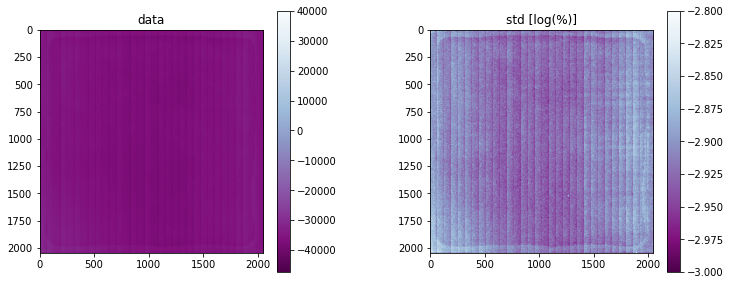

In [74]:

figs,axs = {},{}
def drawMap(fig,ax,data,title,vmin,vmax):
    
    im = ax.imshow(data,vmin=vmin,vmax=vmax, cmap=plt.cm.BuPu_r)
    cbar = fig.colorbar(im,ax = ax,shrink=0.6)
    ax.set_title(title)
    
for ch in chs:
    fig,ax = plt.subplots(1,2)
    figs[ch],axs[ch] =fig,ax
    fig.set_size_inches(12, 8)
    fig.subplots_adjust(wspace=0.4)
    vmin = None
    vmax = None
#     masks[ch]
#     masks["ch1"]
    drawMap(fig,ax[0],plot_data_set[ch],"data",vmin = vmin,vmax = vmax)
    vmin = 25
    vmax = 75
    drawMap(fig,ax[1],np.log10(plot_data_set_std[ch]),"std [log(%)]",vmin = -2.8,vmax = -3)
#     break
plt.show()

In [131]:
# importlib.reload(fits_reader)
for ch in chs:
    f = "./lib/mask/" + ch +"mask.fts"
    fits_reader.saveFits(masks[ch],f)

<IPython.core.display.Javascript object>


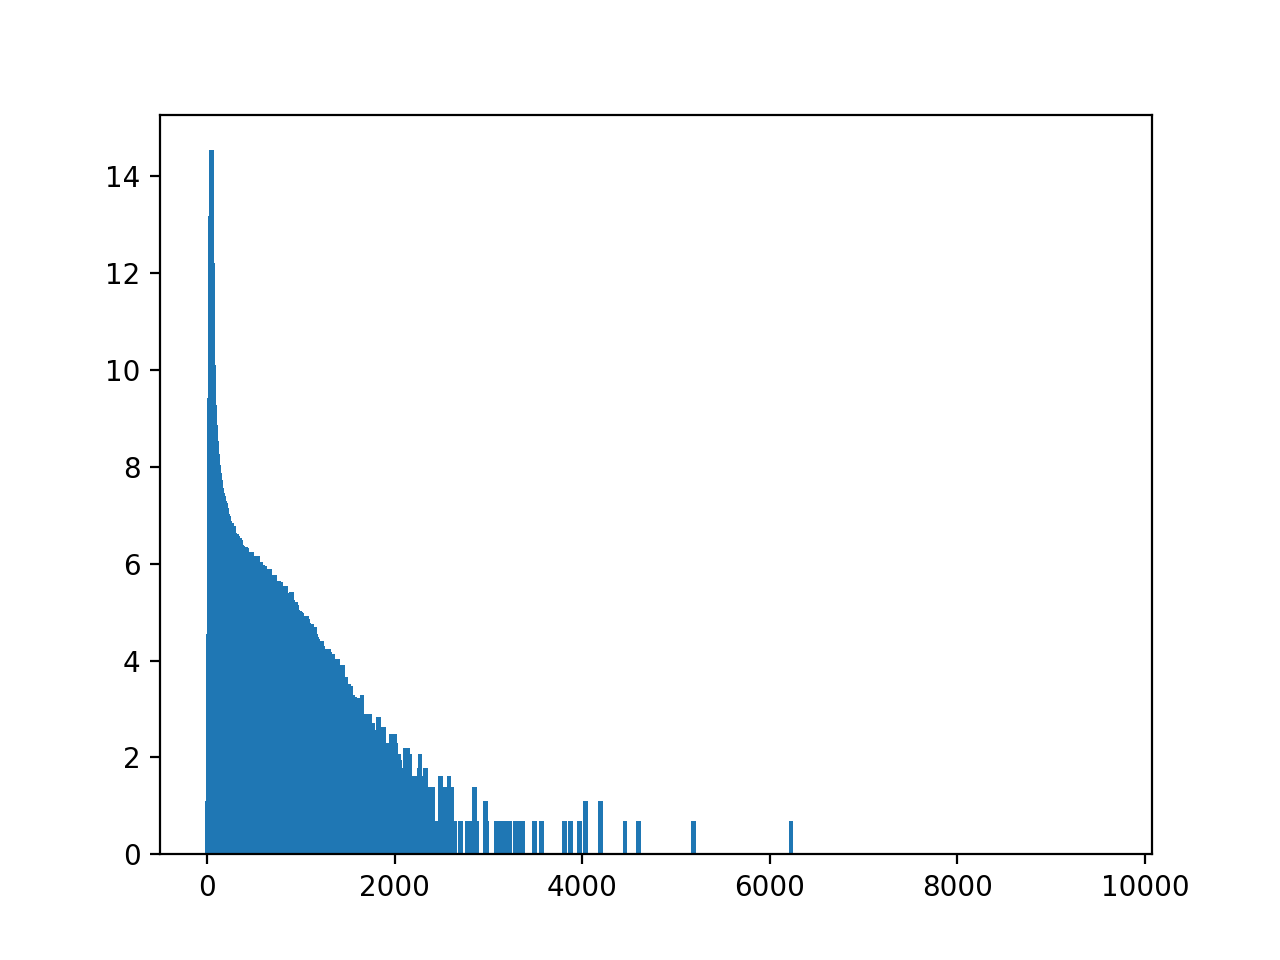

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [47]:
y,x = np.histogram(plot_data_set_std["ch1"],bins=1001, range=(0,10000), normed=None, weights=None, density=None)
# print(x,y)
fig,ax=plt.subplots()
ax.bar(x[:-1],np.log(y),width = 50)
plt.show()

In [16]:
import glob
import os
import numpy as np
import importlib
import matplotlib.pyplot as plt
from fits_reader import fits_reader
from fits_reader import shelf
importlib.reload(fits_reader)
importlib.reload(shelf)






home_directory = os.environ['HOME']
season_name = "/WSMR2021May"
experiment_name = "/ambience/May19"
experiment_directory = home_directory + season_name + experiment_name
# make_shelf(experiment_directory)

exp_shelf = shelf.make_ramp_shelf(experiment_directory)
exp_shelf.line_up_by_excel()
arms = ["armS","armM","armL"]
figs = {}
axs = {}
exp_data = {}
full_names = []
cut_area = fits_reader.AreaSizeClass(1100,1200,1400,1500)

['Silver mask', 'Black mask']
average std % : 0.027964065014826303


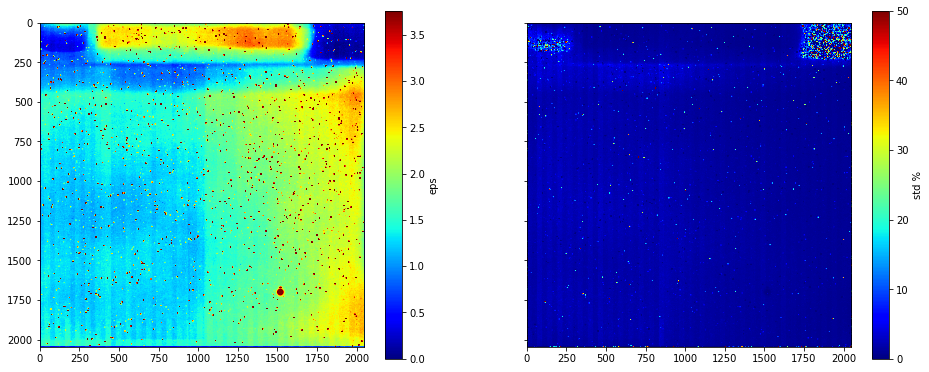

In [17]:
book_name = exp_shelf.show_all_books()[0]
arm_name = 'armS'
exp_shelf.isMask = False
fig, (ax,ax2) = plt.subplots(1,2,figsize=(16, 8),sharex="row",sharey="row")
working_directory = exp_shelf._get_working_directory(book_name,arm_name,)
f = working_directory[1]

a,b,steyx = exp_shelf.plot_eps(arm_name,f,fig,ax,ax2)
# exp_shelf.make_ramp_graph('Silver mask','armS')

Text(0, 0.5, 'counts')

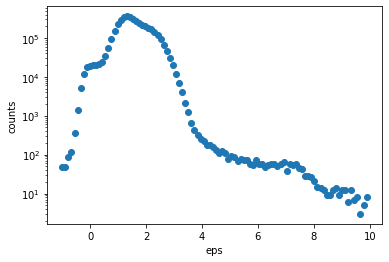

In [41]:
import numpy as np
a_hist,a_range = np.histogram(a,bins=100,range=(-1,10))
plt.scatter(a_range[:-1],a_hist)
plt.yscale("log")
plt.xlabel("eps")
plt.ylabel("counts")

Text(0, 0.5, 'counts')

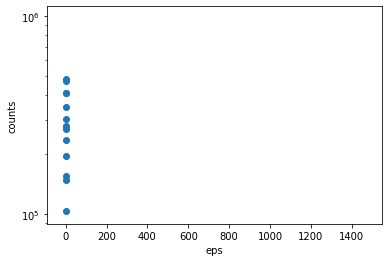

In [151]:
import numpy as np
a_hist,a_range = np.histogram(a,bins=10000)
plt.scatter(a_range[:-1],a_hist)
plt.yscale("log")
plt.xlabel("eps")
plt.ylabel("counts")

2132.0


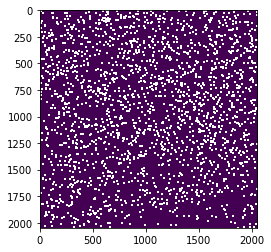

In [149]:
mask_data = np.where(a < 10, 1, np.nan)

pixels = (2048*2048 - np.nansum(mask_data) ) 
print(pixels)
plt.imshow(mask_data)

In [155]:
import glob
import os
import numpy as np
import importlib
import matplotlib.pyplot as plt
from fits_reader import fits_reader
from fits_reader import shelf
importlib.reload(fits_reader)
importlib.reload(shelf)

ch = 'ch1'
# fits_reader.loadMask('ch3',)
masks,_ = fits_reader.save_mask(mask_data,2,ch)
masks
# for ch in chs:
#     f = "./mask/" + ch +"mask.fts"
#     fitsReader.saveFits(masks[ch],f)

ValueError: could not broadcast input array from shape (2,2048,2048) into shape (2048,2048)

In [153]:
mask,_ =fits_reader.loadMask(ch)

ValueError: could not broadcast input array from shape (2,2048,2048) into shape (2048,2048)

In [ ]:
print(np.sum(mask))
print(2048*2048)